In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
def f(x):
    return 3*x**2 + 2*x - 1 

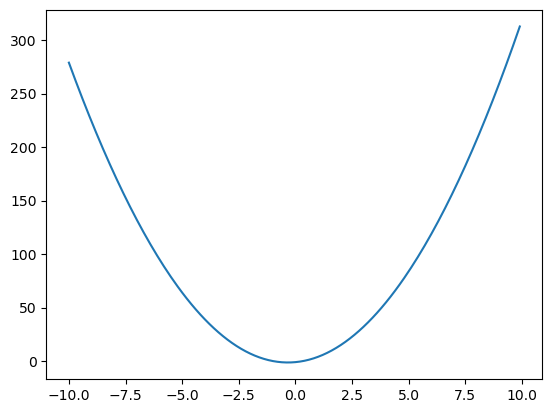

In [14]:
xs = np.arange(-10, 10, 0.1)
ys = f(xs)
plt.plot(xs, ys)

In [15]:
h = 0.000001 # don't make it too small, otherwise it will be a numerical error
x = -1/3
(f(x+h) - f(x))/h

3.000044657142098e-06

In [16]:
# multiple variables

h = 0.001

# inputs
a = 2.0
b = 3.0
c = 4.0

d1 = 2*a*b + c
c += h
d2 = 2*a*b + c

print('d1', d1)
print('d2', d2)
print('numerical derivative', (d2-d1)/h)

d1 16.0
d2 16.001
numerical derivative 1.0000000000012221


### Moving towards NN

In [17]:
# Value object
class Value:
     
    def __init__(self, data, _children=(), _op='', label=''):
          self.data = data
          self.grad = 0.0
          self._prev = set(_children)
          self._op = _op
          self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
         out = Value(self.data + other.data, (self, other), '+')
         return out
    
    def __mul__(self, other):
         out = Value(self.data*other.data, (self, other), '*')
         return out 

In [18]:
a = Value(-2.0, label='a')
b = Value(2.0, label='b')
c = Value(1.5, label='c')
d = a*b; d.label = 'd'
e = d + c; e.label = 'e'
f = Value(-2.0, label = 'f')
L = e*f; L.label = 'L'
L

Value(data=5.0)

In [19]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir':'LR'}) # TB top to bottom, LR left to right
    nodes, edges = trace(root)

    # drawing the nodes
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
        
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    # drawing the edges
    for n1, n2 in edges:
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)    
    
    return dot

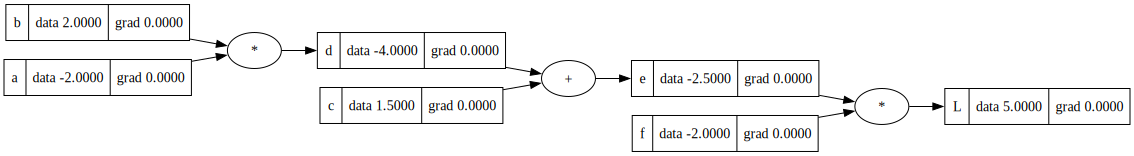

In [20]:
draw_dot(L)

### Computing Gradients (Manual)

In [29]:
def lol():

    h = 0.001 

    a = Value(-2.0, label='a')
    b = Value(2.0, label='b')
    c = Value(1.5, label='c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(-2.0, label = 'f')
    L = e*f; L.label = 'L'
    L1 = L.data

    a = Value(-2.0 + h, label='a')
    b = Value(2.0, label='b')
    c = Value(1.5, label='c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(-2.0, label = 'f')
    L = e*f; L.label = 'L'
    L2 = L.data

    return (L2 - L1)/h

In [30]:
lol()

-3.9999999999995595

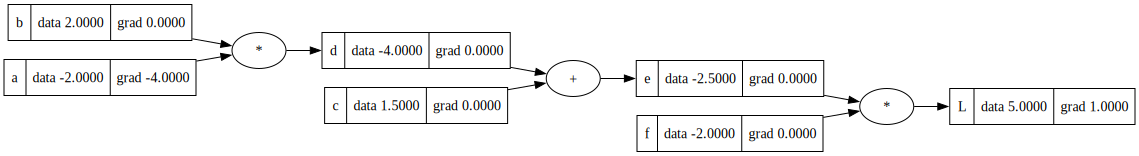

In [31]:
# Let set L.grad = 1, a.grad = -4 and visualize the graph
L.grad = 1
a.grad = -4
draw_dot(L)